In [4]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import tensorflow as tf
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [5]:
fetal_df=pd.read_csv("Resources/fetal_health.csv")
fetal_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
fetal_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
print(f"No of Rows and columns :{fetal_df.shape}")

No of Rows and columns :(2126, 22)


In [8]:
fetal_df["fetal_health"]=fetal_df["fetal_health"].astype("int64")

In [9]:
fetal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Description of columns


baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)

accelerations - Number of accelerations per second

fetal_movement - Number of fetal movements per second

uterine_contractions - Number of uterine contractions per second

light_decelerations - Number of light decelerations per second

severe_decelerations - Number of severe decelerations per second

prolongued_decelerations - Number of prolonged decelerations per second

abnormal_short_term_variability - Percentage of time with abnormal short-term variability

mean_value_of_short_term_variability - Mean value of short-term variability

percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability

mean_value_of_long_term_variability - Mean value of long-term variability

histogram_width - Width of FHR histogram (generated from exam)

histogram_min - Minimum of FHR histogram (generated from exam)

histogram_max - Maximum of FHR histogram (generated from exam)

histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)

histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)

histogram_mode - Mode of FHR histogram (generated from exam)

histogram_mean - Mean of FHR histogram (generated from exam)

histogram_median - Median of FHR histogram (generated from exam)

histogram_variance - Variance of FHR histogram (generated from exam)

histogram_tendency - Tendency of FHR histogram (generated from exam)

fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological



In [10]:
# renaming column
fetal_df = fetal_df.rename(columns = {"baseline value":"baseline_FHR_bpm",
                                    "prolongued_decelerations": "prolonged_decelerations",
                                    "histogram_width": "FHR_hist_width",
                                    "histogram_min": "FHR_hist_min",
                                    "histogram_max": "FHR_hist_max",
                                    "histogram_number_of_peaks": "FHR_hist_num_peaks",
                                    "histogram_number_of_zeroes": "FHR_hist_num_zeroes",
                                    "histogram_mode": "FHR_hist_mode",
                                    "histogram_mean": "FHR_hist_mean",
                                    "histogram_median": "FHR_hist_median",
                                    "histogram_variance": "FHR_hist_variance",
                                    "histogram_tendency": "FHR_hist_tendency",
                                    "abnormal_short_term_variability":"abnorm_ST_Var_Perc",
                                    "mean_value_of_short_term_variability" : "mean_ST_Var",                 
                                    "percentage_of_time_with_abnormal_long_term_variability":"abnorm_LT_Var_Perc",
                                    "mean_value_of_long_term_variability":"mean_LT_Var"
                                     })
fetal_df.columns

Index(['baseline_FHR_bpm', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnorm_ST_Var_Perc', 'mean_ST_Var',
       'abnorm_LT_Var_Perc', 'mean_LT_Var', 'FHR_hist_width', 'FHR_hist_min',
       'FHR_hist_max', 'FHR_hist_num_peaks', 'FHR_hist_num_zeroes',
       'FHR_hist_mode', 'FHR_hist_mean', 'FHR_hist_median',
       'FHR_hist_variance', 'FHR_hist_tendency', 'fetal_health'],
      dtype='object')

In [11]:
fetal_df.to_csv("Resources/clean_fetal_health.csv", index=False)

In [12]:
#check the value counts of fetal health
health_status_ct=fetal_df["fetal_health"].value_counts()
health_status_ct

fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

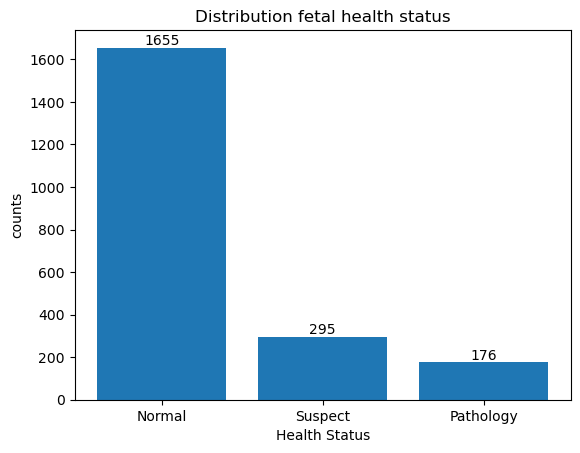

In [13]:
#plot the bar chart

labels = ["Normal", "Suspect", "Pathology"]
plt.bar(labels,health_status_ct)
plt.xlabel("Health Status")
plt.ylabel("counts")
plt.title("Distribution fetal health status")

# Add count labels on top of each bar
for i, count in enumerate(health_status_ct):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.show()

Text(0.5, 1.0, 'Distribution of Fetal Health')

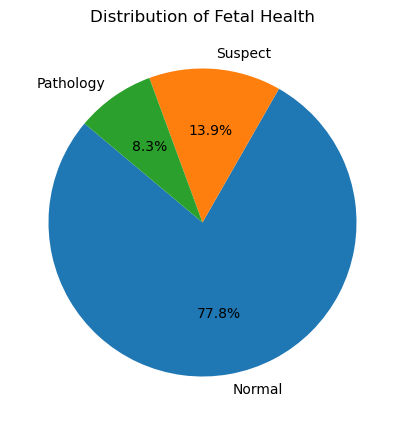

In [14]:
# Plot the pie chart
plt.figure(figsize=(7, 5))  # Optional: Set the figure size
plt.pie(health_status_ct, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Fetal Health")


## Machine Learning Model

Create the labels set (y) from the “fetal_health” column
and then create the features (X) DataFrame from the remaining columns.

In [15]:
# Separate the data into labels and features
# Separate the y variable, the labels
target=fetal_df["fetal_health"]

# Separate the X variable, the features
data = fetal_df.drop("fetal_health",axis=1)
features_df=data.columns


In [16]:
#check the label and features
print(target)
print(features_df)

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64
Index(['baseline_FHR_bpm', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnorm_ST_Var_Perc', 'mean_ST_Var',
       'abnorm_LT_Var_Perc', 'mean_LT_Var', 'FHR_hist_width', 'FHR_hist_min',
       'FHR_hist_max', 'FHR_hist_num_peaks', 'FHR_hist_num_zeroes',
       'FHR_hist_mode', 'FHR_hist_mean', 'FHR_hist_median',
       'FHR_hist_variance', 'FHR_hist_tendency'],
      dtype='object')


In [17]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=48)

In [18]:
#value of count of training dataset
#X_train.shape
train_data=pd.Series(y_train).value_counts()
train_data

fetal_health
1    1245
2     220
3     129
Name: count, dtype: int64

In [19]:
#value of count of testing dataset
#x_test.shape()
test_data=pd.Series(y_test).value_counts()
test_data

fetal_health
1    410
2     75
3     47
Name: count, dtype: int64

## Random Oversampling technique to balance the class distribution.

In [20]:
#instantiate the random_oversampler 
Sampler = RandomOverSampler(random_state=48)
X_sample, y_sample = Sampler.fit_resample(X_train,y_train)

# Fit the original training data to the random_oversampler 
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_sample, y_sample, random_state=48)

In [21]:
#value of count of training dataset after ros
#X_train.shape
train_data_ros=pd.Series(y_train_ros).value_counts()
train_data_ros=train_data_ros.sort_index()
train_data_ros

fetal_health
1    922
2    932
3    947
Name: count, dtype: int64

In [22]:
#value of count of testing dataset after ros
#x_test.shape()
test_data_ros=pd.Series(y_test_ros).value_counts()
test_data_ros

fetal_health
1    323
2    313
3    298
Name: count, dtype: int64

<Figure size 1000x2000 with 0 Axes>

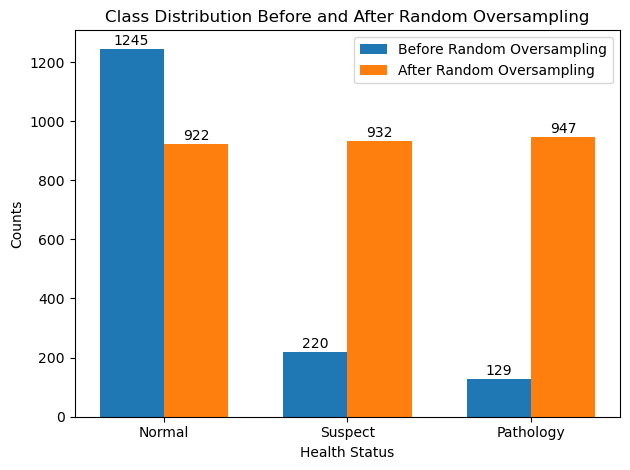

In [23]:
#set the labels
labels = ["Normal", "Suspect", "Pathology"]

# Generate evenly spaced x positions for the bars
x = np.arange(len(labels))

# Define the width of the bars
width = 0.35  

   
plt.figure(figsize=(10,20))

# Create subplots
fig, ax = plt.subplots()

# Plot the bars for the original data
rects1 = ax.bar(x - width/2, train_data, width, label='Before Random Oversampling')

# Plot the bars for the oversampled data
rects2 = ax.bar(x + width/2, train_data_ros, width, label='After Random Oversampling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Health Status')
ax.set_ylabel('Counts')
ax.set_title('Class Distribution Before and After Random Oversampling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add counts on top of each bar using enumerate
for i, rect in enumerate(rects1 + rects2):
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,0.7),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

 
plt.tight_layout()


# Display the plot
plt.show()

## Random Forest 


In [24]:
#create Random Forest classifier
rf = RandomForestClassifier(n_estimators=500,random_state=48)

# Train the classifier
model_trained = rf.fit(X_train_ros, y_train_ros)

In [25]:
#Make predictions on the test set
predictions_rf = rf.predict(X_test_ros)

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test_ros, predictions_rf)
print("Accuracy_RF:", accuracy)

Accuracy_RF: 0.9850107066381156


In [27]:
#Generate confusion matrix
cm=confusion_matrix(y_test_ros, predictions_rf)
cm_df=pd.DataFrame(cm,index=["Normal","Suspect","pathology"],columns=["Normal","Suspect","pathology"])
print("Random Forest Confusion Matix")
cm_df

Random Forest Confusion Matix


,Normal,Suspect,pathology
Normal,309,11,3
Suspect,0,313,0
pathology,0,0,298


In [28]:
# print the classification report
print(" Random Forest using random over sampler")
rf_report=classification_report(y_test_ros, predictions_rf)
print(rf_report)

 Random Forest using random over sampler
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       323
           2       0.97      1.00      0.98       313
           3       0.99      1.00      0.99       298

    accuracy                           0.99       934
   macro avg       0.99      0.99      0.99       934
weighted avg       0.99      0.99      0.98       934



In [29]:
# # Get feature importances
# importances =rf.feature_importances_

# # Get indices of top 10 features
# top_indices = np.argsort(importances)[::-1][:10]



# # Print top 10 important features
# print("Top 10 important features:")
# for i, index in enumerate(top_indices, 1):
#     print(f"{i}. {features_df[index]}: {importances[index]}")

In [30]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
# We can sort the features by their importance
importances_sorted=sorted(zip(rf.feature_importances_,data.columns), reverse=True)
print("Top 10 important features")
importances_sorted[:10]

Top 10 important features


[(0.14600281373170815, 'abnorm_ST_Var_Perc'),
 (0.13499189121026411, 'abnorm_LT_Var_Perc'),
 (0.10168999783295998, 'FHR_hist_mean'),
 (0.08860578717514497, 'FHR_hist_median'),
 (0.06997275311793838, 'mean_ST_Var'),
 (0.06917201853175843, 'accelerations'),
 (0.057003981277807016, 'FHR_hist_mode'),
 (0.05172785568583488, 'mean_LT_Var'),
 (0.042866740404277265, 'baseline_FHR_bpm'),
 (0.036691365512368276, 'prolonged_decelerations')]

In [31]:
# # Sort importances and indices in ascending order
# sorted_indices = np.argsort(importances[top_indices])
# sorted_importances = importances[top_indices][sorted_indices]

# plt.figure(figsize=(10, 6))
# plt.barh(range(len(top_indices)), sorted_importances, color="purple")  # Using purple color
# plt.yticks(range(len(top_indices)), [features_df[i] for i in top_indices[sorted_indices]])
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.title("Top 10 Important Features")
# plt.show()

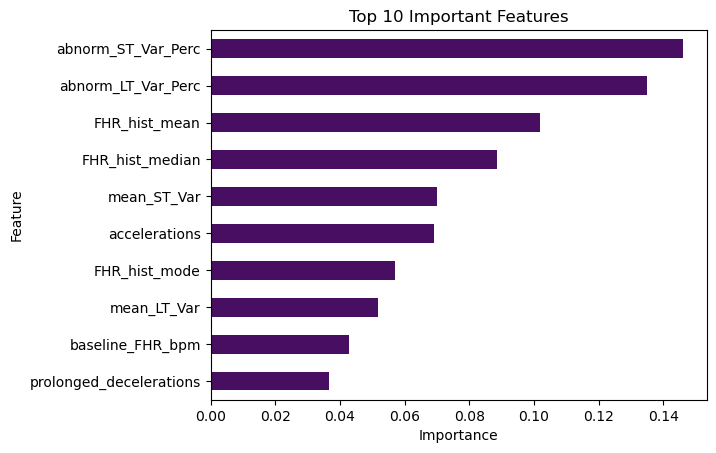

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf.feature_importances_, data.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: "Feature Importances"}, inplace=True)
importances_sorted = importances_df.sort_values(by="Feature Importances")

# Selecting only the top 10 important features
top_10_importances = importances_sorted.tail(10)

# Plotting the top 10 important features
top_10_importances.plot(kind="barh",color=plt.cm.viridis(top_10_importances["Feature Importances"]), title="Top 10 Important Features", legend=False)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [35]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.8/686.8 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 19.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 22.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━

In [40]:
import tensorflow as tf
import os
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model
import joblib
import json

# Load your trained model
model = model_trained
model_path = 'random_forest_model.pkl'

# Save your trained Random Forest model
joblib.dump(model, 'random_forest_model.pkl')

# Define a function to convert your model to TensorFlow.js format
def convert_to_tfjs(model_path, output_dir, n_estimators, random_state):
    model = joblib.load(model_path)
    # Define a TensorFlow.js compatible JSON object
    json_model = {
        "format": "tensorflowjs",
        "modelTopology": {
            "type": "RandomForest",
            "n_estimators": n_estimators,
            "random_state": random_state
        },
        "weightsManifest": [],
    }
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # Save the JSON object
    with open(output_dir + '/model.json', 'w') as outfile:
        json.dump(json_model, outfile)

# Convert the model to TensorFlow.js format
convert_to_tfjs('random_forest_model.pkl', 'tfjs_model', n_estimators=500, random_state=48)

## Gradient Boosting Classifier


In [ ]:
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=48)

In [ ]:
# Train the classifier on the training data
gb_classifier.fit(X_train_ros, y_train_ros)


GradientBoostingClassifier(random_state=48)

In [ ]:
# Make predictions on the testing data
predictions_gb = gb_classifier.predict(X_test_ros)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_ros, predictions_gb)
print("Accuracy_gb:", accuracy)


Accuracy_gb: 0.9817987152034261


In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test_ros, predictions_gb)
print("Confusion Matrix:")
cm_df=pd.DataFrame(cm,index=["Normal","Suspect","pathology"],columns=["Normal","Suspect","pathology"])
print("Gradient Boosting Classifier")
cm_df

Confusion Matrix:
Gradient Boosting Classifier


,Normal,Suspect,pathology
Normal,308,13,2
Suspect,2,311,0
pathology,0,0,298


In [ ]:
# Generate a classification report
print("GB Classification Report :")
gb_report=classification_report(y_test_ros, predictions_gb)
print(gb_report)

GB Classification Report :
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       323
           2       0.96      0.99      0.98       313
           3       0.99      1.00      1.00       298

    accuracy                           0.98       934
   macro avg       0.98      0.98      0.98       934
weighted avg       0.98      0.98      0.98       934



## KNN Classifier 


In [ ]:
# Create a KNN classifier 
knn = KNeighborsClassifier()

In [ ]:
# Define the hyperparameter grid for grid search
param_grid = {
    'n_neighbors': [2,3, 5, 7, 9],  # Adjust the number of neighbors
    'weights': ['uniform', 'distance'],  # Adjust the weight function ('uniform' or 'distance')
   
}


In [ ]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
best_params

{'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
# Train the classifier on the training data
#knn.fit(X_train_ros, y_train_ros)



In [ ]:

# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

In [ ]:
# Train the classifier with the best hyperparameters
best_knn.fit(X_train_ros, y_train_ros)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [ ]:
# Make predictions on the testing data
predictions_knn= best_knn.predict(X_test_ros)

In [ ]:
# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test_ros,predictions_knn)
print("Accuracy_Knn:", accuracy_knn)

Accuracy_Knn: 0.9785867237687366


In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test_ros, predictions_knn)
print("Confusion Matrix:")
cm_df=pd.DataFrame(cm,index=["Normal","Suspect","pathology"],columns=["Normal","Suspect","pathology"])
print("KNN Classifier")
cm_df

Confusion Matrix:
KNN Classifier


,Normal,Suspect,pathology
Normal,303,20,0
Suspect,0,313,0
pathology,0,0,298


In [ ]:
# Generate a classification report
print("KNN Classification Report :")
knn_report=classification_report(y_test_ros, predictions_knn)
print(knn_report)

KNN Classification Report :
              precision    recall  f1-score   support

           1       1.00      0.94      0.97       323
           2       0.94      1.00      0.97       313
           3       1.00      1.00      1.00       298

    accuracy                           0.98       934
   macro avg       0.98      0.98      0.98       934
weighted avg       0.98      0.98      0.98       934



## Support Vector Machine Algorithm

In [ ]:
# Preview CSV data
data = Path("Resources/clean_Fetal_health.csv")
df = pd.read_csv(data)
df.head()

,baseline_FHR_bpm,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnorm_ST_Var_Perc,mean_ST_Var,abnorm_LT_Var_Perc,...,FHR_hist_min,FHR_hist_max,FHR_hist_num_peaks,FHR_hist_num_zeroes,FHR_hist_mode,FHR_hist_mean,FHR_hist_median,FHR_hist_variance,FHR_hist_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


In [ ]:

scaler = StandardScaler()

X_scaler = scaler.fit(X_train_ros)

X_train_scaled = X_scaler.transform(X_train_ros)
X_test_scaled = X_scaler.transform(X_test_ros)

In [ ]:
# Define the SVM classifier
svm = SVC(random_state=48)

In [ ]:


# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient (for 'rbf' and 'poly' kernels)
}


# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_ros)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_





In [ ]:
# Create a new SVM classifier with the best hyperparameters
best_svm = SVC(**best_params)
best_svm 

SVC(C=10, kernel='poly')

In [ ]:

# Train the classifier with the best hyperparameters and scaled data
best_svm.fit(X_train_scaled, y_train_ros)

SVC(C=10, kernel='poly')

In [ ]:
# Make predictions on the scaled test data
predictions_svm = best_svm.predict(X_test_scaled)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_ros, predictions_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9635974304068522


In [ ]:
# Make predicitions
predictions = best_svm.predict(X_test_scaled)
predictions_formatted = [f'{pred:.1f}' for pred in predictions]
predictions_formatted

['3.0',
 '2.0',
 '1.0',
 '2.0',
 '3.0',
 '3.0',
 '2.0',
 '3.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '2.0',
 '2.0',
 '2.0',
 '2.0',
 '3.0',
 '2.0',
 '3.0',
 '1.0',
 '3.0',
 '3.0',
 '3.0',
 '1.0',
 '2.0',
 '1.0',
 '3.0',
 '2.0',
 '2.0',
 '1.0',
 '2.0',
 '3.0',
 '3.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0',
 '2.0',
 '3.0',
 '3.0',
 '1.0',
 '3.0',
 '2.0',
 '3.0',
 '3.0',
 '1.0',
 '2.0',
 '2.0',
 '1.0',
 '3.0',
 '3.0',
 '1.0',
 '1.0',
 '1.0',
 '3.0',
 '1.0',
 '3.0',
 '2.0',
 '3.0',
 '2.0',
 '1.0',
 '2.0',
 '1.0',
 '3.0',
 '2.0',
 '2.0',
 '1.0',
 '3.0',
 '1.0',
 '2.0',
 '2.0',
 '3.0',
 '1.0',
 '1.0',
 '3.0',
 '2.0',
 '3.0',
 '3.0',
 '3.0',
 '3.0',
 '1.0',
 '3.0',
 '2.0',
 '1.0',
 '2.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0',
 '2.0',
 '3.0',
 '2.0',
 '2.0',
 '1.0',
 '2.0',
 '2.0',
 '2.0',
 '1.0',
 '2.0',
 '3.0',
 '2.0',
 '2.0',
 '1.0',
 '1.0',
 '2.0',
 '2.0',
 '1.0',
 '3.0',
 '3.0',
 '2.0',
 '1.0',
 '1.0',
 '1.0',
 '2.0',
 '2.0',
 '3.0',
 '1.0',


In [ ]:
# Print classification report

svm_report = classification_report(y_test_ros, predictions_svm)
print(svm_report)

              precision    recall  f1-score   support

           1       0.99      0.91      0.95       323
           2       0.91      0.99      0.95       313
           3       1.00      0.99      0.99       298

    accuracy                           0.96       934
   macro avg       0.97      0.96      0.96       934
weighted avg       0.97      0.96      0.96       934



In [ ]:


cm = confusion_matrix(y_test_ros, predictions_svm)
cm_df = pd.DataFrame(
    cm,
    index=['Actual 1.0', 'Actual 2.0', 'Actual 3.0'], 
    columns=['Predicted 1.0', 'Predicted 2.0', 'Predicted 3.0']
)

cm_df

,Predicted 1.0,Predicted 2.0,Predicted 3.0
Actual 1.0,295,27,1
Actual 2.0,3,310,0
Actual 3.0,0,3,295


In [ ]:


accuracy = accuracy_score(y_test_ros, predictions)
print(f"Accuracy score: {round((accuracy), 2)}")

precision = precision_score(y_test_ros, predictions, average = 'macro')
print(f"Precision score: {round((precision), 2)}")

Accuracy score: 0.96
Precision score: 0.97


## Neural Network Model

In [ ]:
# Preview CSV data
data = Path("Resources/clean_fetal_health.csv")
df = pd.read_csv(data)
df.head()

,baseline_FHR_bpm,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnorm_ST_Var_Perc,mean_ST_Var,abnorm_LT_Var_Perc,...,FHR_hist_min,FHR_hist_max,FHR_hist_num_peaks,FHR_hist_num_zeroes,FHR_hist_mode,FHR_hist_mean,FHR_hist_median,FHR_hist_variance,FHR_hist_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


In [ ]:
# Scale X data


scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Find input dimensions
input_dim = len(df.columns) - 1

In [ ]:
# Define the deep learning model 
nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_dim = input_dim))

nn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))


nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check model summary
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Sequential model together and customize metrics
nn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs =500,batch_size=32)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7416 - loss: 0.0000e+00 
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7859 - loss: 0.0000e+00
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8077 - loss: 0.0000e+00
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7781 - loss: 0.0000e+00
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7935 - loss: 0.0000e+00
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7864 - loss: 0.0000e+00
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.0000e+00
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.0000e+00
Epoch 9/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7715 - loss: 0.0000e+00
Epoch 10/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7738 - loss: 0.0000e+00
Epoch 11/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7847 - loss: 0.0000e+00
Epoch 12/500
50/50

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7779 - loss: 0.0000e+00
Epoch 67/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7816 - loss: 0.0000e+00 
Epoch 68/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7630 - loss: 0.0000e+00
Epoch 69/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8089 - loss: 0.0000e+00
Epoch 70/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.0000e+00 
Epoch 71/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7869 - loss: 0.0000e+00
Epoch 72/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7905 - loss: 0.0000e+00
Epoch 73/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7969 - loss: 0.0000e+00
Epoch 74/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7845 - loss: 0.0000e+00
Epoch 75/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7689 - loss: 0.0000e+00
Epoch 76/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7649 - loss: 0.0000e+00
Epoch 77/500
50/50 

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7544 - loss: 0.0000e+00
Epoch 132/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.0000e+00
Epoch 133/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7796 - loss: 0.0000e+00 
Epoch 134/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7781 - loss: 0.0000e+00
Epoch 135/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7774 - loss: 0.0000e+00 
Epoch 136/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7898 - loss: 0.0000e+00 
Epoch 137/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7851 - loss: 0.0000e+00 
Epoch 138/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7537 - loss: 0.0000e+00
Epoch 139/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7791 - loss: 0.0000e+00
Epoch 140/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7836 - loss: 0.0000e+00
Epoch 141/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7728 - loss: 0.0000e+00
Epoch 142

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7776 - loss: 0.0000e+00 
Epoch 197/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.0000e+00
Epoch 198/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7791 - loss: 0.0000e+00
Epoch 199/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7874 - loss: 0.0000e+00 
Epoch 200/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7862 - loss: 0.0000e+00
Epoch 201/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7722 - loss: 0.0000e+00
Epoch 202/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7918 - loss: 0.0000e+00
Epoch 203/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.7834 - loss: 0.0000e+00
Epoch 204/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7724 - loss: 0.0000e+00
Epoch 205/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7698 - loss: 0.0000e+00
Epoch 206/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7658 - loss: 0.0000e+00
Epoch 2

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.7835 - loss: 0.0000e+00
Epoch 262/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7789 - loss: 0.0000e+00
Epoch 263/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7841 - loss: 0.0000e+00
Epoch 264/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.7837 - loss: 0.0000e+00
Epoch 265/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7846 - loss: 0.0000e+00
Epoch 266/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7805 - loss: 0.0000e+00 
Epoch 267/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7883 - loss: 0.0000e+00
Epoch 268/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7789 - loss: 0.0000e+00
Epoch 269/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7790 - loss: 0.0000e+00
Epoch 270/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7915 - loss: 0.0000e+00
Epoch 271/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.0000e+00 
Epo

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7671 - loss: 0.0000e+00
Epoch 327/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.7838 - loss: 0.0000e+00
Epoch 328/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.0000e+00 
Epoch 329/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.7711 - loss: 0.0000e+00
Epoch 330/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7899 - loss: 0.0000e+00
Epoch 331/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7746 - loss: 0.0000e+00
Epoch 332/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.7900 - loss: 0.0000e+00
Epoch 333/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7921 - loss: 0.0000e+00 
Epoch 334/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.0000e+00
Epoch 335/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7747 - loss: 0.0000e+00
Epoch 336/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.0000e+00
Epoch

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7863 - loss: 0.0000e+00
Epoch 392/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7690 - loss: 0.0000e+00
Epoch 393/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7731 - loss: 0.0000e+00
Epoch 394/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.0000e+00 
Epoch 395/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7761 - loss: 0.0000e+00
Epoch 396/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7633 - loss: 0.0000e+00
Epoch 397/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.7849 - loss: 0.0000e+00
Epoch 398/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7877 - loss: 0.0000e+00 
Epoch 399/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.7634 - loss: 0.0000e+00
Epoch 400/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.7759 - loss: 0.0000e+00
Epoch 401/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7806 - loss: 0.0000e+00
E

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7777 - loss: 0.0000e+00
Epoch 457/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7635 - loss: 0.0000e+00
Epoch 458/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.7811 - loss: 0.0000e+00
Epoch 459/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7872 - loss: 0.0000e+00
Epoch 460/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.7941 - loss: 0.0000e+00
Epoch 461/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.0000e+00
Epoch 462/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7712 - loss: 0.0000e+00
Epoch 463/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7642 - loss: 0.0000e+00
Epoch 464/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7817 - loss: 0.0000e+00
Epoch 465/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.0000e+00
Epoch 466/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7855 - loss: 0.0000e+00
Epoch 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

17/17 - 0s - 3ms/step - accuracy: 0.7707 - loss: 0.0000e+00
Loss: 0.0, Accuracy: 0.7706766724586487


##  Decision Tree

In [ ]:
# instantiating and fitting decision tree model
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42) 
dt.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
#predict the model
predictions_dt = dt.predict(X_test_ros)

In [ ]:
# confusion matrix 

cm = confusion_matrix(y_test_ros, predictions_dt)
print("Confusion Matrix:")
cm_df=pd.DataFrame(cm,index=["Normal","Suspect","pathology"],columns=["Normal","Suspect","pathology"])
print("Decision Tree")
cm_df


Confusion Matrix:
Decision Tree


,Normal,Suspect,pathology
Normal,272,46,5
Suspect,29,284,0
pathology,5,6,287


In [ ]:

# Generate a classification report
print("Decision Tree Classification Report :")
dt_report=classification_report(y_test_ros, predictions_dt)
print(dt_report)

Decision Tree Classification Report :
              precision    recall  f1-score   support

           1       0.89      0.84      0.86       323
           2       0.85      0.91      0.88       313
           3       0.98      0.96      0.97       298

    accuracy                           0.90       934
   macro avg       0.91      0.90      0.90       934
weighted avg       0.90      0.90      0.90       934



In [ ]:
# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test_ros,predictions_dt)
print("Accuracy_dt:", accuracy_dt)

Accuracy_dt: 0.9025695931477516


In [ ]:
# Create a dictionary to store classification reports for each model
classification_reports = {
    "Random Forest": rf_report,
    "SVM": svm_report,
    "Gradient Boosting": gb_report,
    "Decision Tree": dt_report,
    "KNN "      : knn_report
}